# Waiter Tips Analysis

This project explores the factors influencing waiter tips using data analysis and machine learning. By analyzing features such as total bill, time of day, customer demographics, and dining habits, we aim to build a predictive model for tip amounts.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("tips.csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Data Exploration and Analysis

In [2]:
#adding tip percentage column to analyze tip behavior better
data["tip_percentage"] = (data["tip"] / data["total_bill"]) * 100

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bill      244 non-null    float64
 1   tip             244 non-null    float64
 2   sex             244 non-null    object 
 3   smoker          244 non-null    object 
 4   day             244 non-null    object 
 5   time            244 non-null    object 
 6   size            244 non-null    int64  
 7   tip_percentage  244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


In [4]:
data.describe()

,total_bill,tip,size,tip_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [5]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
tip_percentage,0


In [6]:
#interaction feature
data["bill_size_interaction"] = data["total_bill"] * data["size"]

In [7]:
fig = px.scatter(data, x="bill_size_interaction", y="tip_percentage",
                 title="Tip Percentages vs. Bill-Size Interaction", trendline="ols")
fig.show()

**This shows that larger groups tip less per person**

In [8]:
import plotly.express as px

figure = px.scatter(data_frame=data, x="total_bill", y="tip",
                    size="size", color="day", trendline="ols",
                    facet_col="sex", facet_row="time")
figure.show()

In [9]:
fig = px.bar(data, x="day", y="tip", color="day",
             title="Total Tips by Day", text_auto=True)
fig.show()

fig = px.bar(data, x="sex", y="tip", color="sex",
             title="Total Tips by Gender", text_auto=True)
fig.show()

fig = px.bar(data, x="smoker", y="tip", color="smoker",
             title="Total Tips by Smoker Status", text_auto=True)
fig.show()

fig = px.bar(data, x="time", y="tip", color="time",
             title="Total Tips by Time of Day", text_auto=True)
fig.show()

In [10]:
fig = px.histogram(data, x="tip_percentage", nbins=20, title="Distribution of Tip Percentage")
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.show()

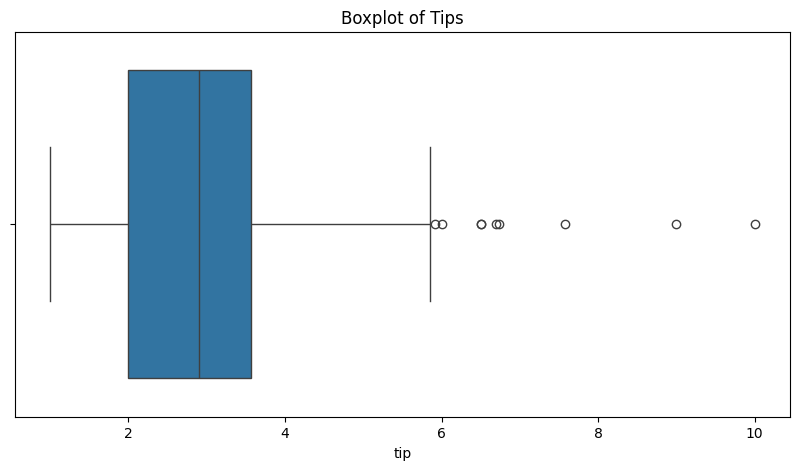

In [11]:
#Detecting outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=data["tip"])
plt.title("Boxplot of Tips")
plt.show()

In [12]:
#handling outliers
Q1 = data["tip"].quantile(0.25)
Q3 = data["tip"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data[(data["tip"] >= lower_bound) & (data["tip"] <= upper_bound)]

## Waiter tips prediction model

In [23]:
data_cleaned["sex"] = data_cleaned["sex"].map({"Female": 0, "Male": 1})
data_cleaned["smoker"] = data_cleaned["smoker"].map({"No": 0, "Yes": 1})
data_cleaned["day"] = data_cleaned["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data_cleaned["time"] = data_cleaned["time"].map({"Lunch": 0, "Dinner": 1})
data_cleaned.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,bill_size_interaction
0,16.99,1.01,0,0,3,1,2,5.944673,33.98
1,10.34,1.66,1,0,3,1,3,16.054159,31.02
2,21.01,3.50,1,0,3,1,3,16.658734,63.03
3,23.68,3.31,1,0,3,1,2,13.978041,47.36
4,24.59,3.61,0,0,3,1,4,14.680765,98.36


In [24]:
x = np.array(data_cleaned[["total_bill", "sex", "smoker", "day",
                   "time", "size"]])
y = np.array(data_cleaned["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [26]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.17827396])